# 1. Importar librerias

In [95]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import joblib  ### para guardar modelos

#Importar módulo de funciones
import sys
sys.path.insert(0, 'utils')  # Añadir el directorio 'utils' al PATH
import funciones
from importlib import reload
reload(funciones)  # Recarga el módulo

<module 'funciones' from 'c:\\recursos_humanos\\utils\\funciones.py'>

# 2. Obtener datos

#### Importar datos

In [96]:
data = pd.read_csv('data/seleccion_gb.csv')
data_no_std = pd.read_csv('data/data_2015_clean.csv')

In [97]:
data.columns

Index(['num__Age', 'num__DistanceFromHome', 'num__MonthlyIncome',
       'num__NumCompaniesWorked', 'num__PercentSalaryHike',
       'num__TrainingTimesLastYear', 'num__YearsAtCompany',
       'cat__EnvironmentSatisfaction_Bajo', 'cat__JobSatisfaction_Bajo',
       'cat__JobSatisfaction_Muy alto', 'cat__WorkLifeBalance_Mala',
       'cat__BusinessTravel_Travel_Frequently',
       'cat__Department_Human Resources',
       'cat__EducationField_Human Resources', 'cat__MaritalStatus_Single',
       'target'],
      dtype='object')

In [101]:
data.columns

Index(['num__Age', 'num__DistanceFromHome', 'num__MonthlyIncome',
       'num__NumCompaniesWorked', 'num__PercentSalaryHike',
       'num__TrainingTimesLastYear', 'num__YearsAtCompany',
       'cat__EnvironmentSatisfaction_Bajo', 'cat__JobSatisfaction_Bajo',
       'cat__JobSatisfaction_Muy alto', 'cat__WorkLifeBalance_Mala',
       'cat__BusinessTravel_Travel_Frequently',
       'cat__Department_Human Resources',
       'cat__EducationField_Human Resources', 'cat__MaritalStatus_Single',
       'target'],
      dtype='object')

#### Separar variable objetivo y hacer el split

In [104]:
num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike',
       'TrainingTimesLastYear', 'YearsAtCompany']
cat_cols = ['EnvironmentSatisfaction_Bajo', 'JobSatisfaction_Bajo',
       'JobSatisfaction_Muy alto', 'WorkLifeBalance_Mala',
       'BusinessTravel_Travel_Frequently',
       'Department_Human Resources',
       'EducationField_Human Resources', 'MaritalStatus_Single']
var_names =pd.DataFrame(['num__Age', 'num__DistanceFromHome', 'num__MonthlyIncome',
       'num__NumCompaniesWorked', 'num__PercentSalaryHike',
       'num__TrainingTimesLastYear', 'num__YearsAtCompany',
       'cat__EnvironmentSatisfaction_Bajo', 'cat__JobSatisfaction_Bajo',
       'cat__JobSatisfaction_Muy alto', 'cat__WorkLifeBalance_Mala',
       'cat__BusinessTravel_Travel_Frequently',
       'cat__Department_Human Resources',
       'cat__EducationField_Human Resources', 'cat__MaritalStatus_Single'])
var_names.columns = ['features']

In [61]:
df = pd.concat([data_no_std[num_cols], data[data.columns[7:]]], axis=1)
X = df.drop('target', axis = 1)
y = df.target
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Busqueda de hiperparametros

## 3.1 Decision Tree Classifier

#### Definir grilla

In [87]:
parameters = {'max_depth': [2,3,4,5,6,7,8,9,10,15,20],
              'max_leaf_nodes': [140,200,210,220,230,240],
              'min_samples_leaf': [2,3,5,7,9,11,13,15,17,19,21,23],
              'class_weight': ['balanced']}

#### Realizar busqueda

In [88]:
dt = DecisionTreeClassifier(random_state = 42)
rand_s = GridSearchCV(estimator = dt,
                            param_grid = parameters,
                            n_jobs = -1,
                            scoring = 'f1',
                            cv=5,
                            verbose = True)
rand_s.fit(X_train, y_train)

Fitting 5 folds for each of 792 candidates, totalling 3960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
                         'max_leaf_nodes': [140, 200, 210, 220, 230, 240],
                         'min_samples_leaf': [2, 3, 5, 7, 9, 11, 13, 15, 17, 19,
                                              21, 23]},
             scoring='f1', verbose=True)

#### Modelo con mejores hiperparametros

In [89]:
rand_s.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       max_leaf_nodes=240, min_samples_leaf=2, random_state=42)

In [90]:
dt_final = rand_s.best_estimator_

#### Evaluación

------------------------------ TRAIN ------------------------------


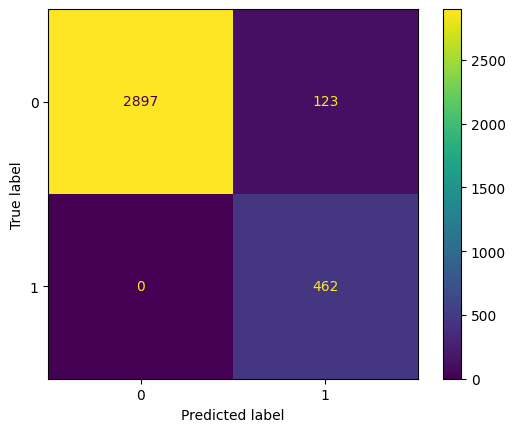

Precision: 0.7897435897435897
Recall: 1.0
Especificidad: 0.9592715231788079
F1 score: 0.8825214899713467
Train score:  0.9646754738655945
------------------------------ TEST ------------------------------


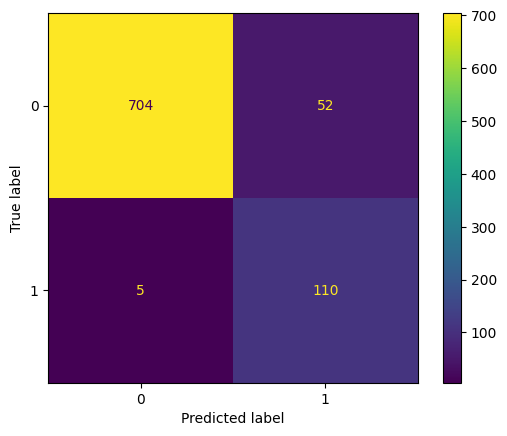

Precision: 0.6790123456790124
Recall: 0.9565217391304348
Especificidad: 0.9312169312169312
F1 score: 0.7942238267148014
Train score:  0.9345579793340988


In [91]:
res_train = funciones.metricas(dt_final,X_train,y_train,'TRAIN')
res_test = funciones.metricas(dt_final,X_test,y_test,'TEST')

In [105]:
joblib.dump(dt_final, "salidas/dt_final.pkl")
joblib.dump(var_names, "salidas/var_names.pkl")
df.to_csv('data/df_final.csv', index = False)